# This is analysis to find insights from sentiments of customers who have reviewed the hotels. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
import pandas as pd
reviews_df=pd.read_csv('https://raw.githubusercontent.com/novaaky/Machine-Learning-for-Hospitality/master/Sentiment%20Analysis/Review_set_hotel.csv')
reviews_df.head()

,Unnamed: 0,EstablishmentId,Summary
0,0,111850,When you stay at NH Vienna Airport Conference ...
1,1,111870,Property Location <br/>With a stay at Enziana ...
2,2,111956,"Grand not only in name but also in comfort, st..."
3,3,112159,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...
4,4,112165,"A blend of design and warmth, the 4 star Hotel..."


In [0]:
#reviews_df.EstablishmentId.value_counts()

## Each establishment ID is unique. So it doesn't make any sense to keep them in the data as it just add noise

In [0]:
df=reviews_df[['Summary']]

In [8]:
df.Summary[0]

"When you stay at NH Vienna Airport Conference Center in Schwechat, you'll be near the airport and within the vicinity of Central Cemetery and Neugebaude Castle. This 4-star hotel is within the region of Golf Club Leopoldsdorf and Gasometer.Rooms <br/>Make yourself at home in one of the 500 air-conditioned rooms featuring minibars. Complimentary wireless Internet access is available to keep you connected. Conveniences include direct-dial phones, as well as safes and desks.Rec, Spa, Premium Amenities <br/>Take advantage of recreational opportunities offered, including a sauna, a steam room, and a fitness facility. Additional features include wireless Internet access (surcharge), a television in the lobby, and tour/ticket assistance.Dining <br/>Enjoy a meal at a restaurant, or stay in and take advantage of the hotel's 24-hour room service."

## Seems the data has been scraped from web (HTML) directly, hence removing HTML tags from reviews.

In [0]:
import re

def remove_tags(text):
    return re.compile(r'<[^>]+>').sub('', text)

In [10]:
df['Summary']=df['Summary'].apply(str)
df['Summary']= df['Summary'].apply(lambda x: remove_tags(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Many Special characters are present. We need to remove them before analysis is done. However, Sentences are to be retrained to get sentiments sentence wise. Also, Having difference character cases will help us to identify the Hotel names (as they are Nouns). Hence, I'm retraining the different versions of the reviews. 

In [13]:
import nltk
nltk.download('punkt')

def remove_punctuation(text):    
    words = nltk.word_tokenize(text)
    words=[word for word in words if word.isalpha()]
    return (' '.join(words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
df['Summary_2']= df['Summary'].apply(lambda x: remove_punctuation(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Removing all special characters except full stops.

In [0]:
import re
def remove_punctuation2(text):
    return (re.sub(r'[!,.:;-](?= |$)',r'',text))

In [0]:
df['Summary_3']= df['Summary'].apply(lambda x: remove_punctuation2(x))

In [0]:
#df

In [18]:
df.Summary[2]

'Grand not only in name but also in comfort, style and location, the Warwick Brussels has become the premier hotel amongst refined Belgian visitors. By blending classic charm with luxury amenities that are expected from a Warwick Hotel, guests are treated to the feel of Old World elegance with the added convenience of modern accommodations. The Grand Place, Le Square Convention Centre and Manneken Pis are all but a stoneâ€™s throw from the hotelâ€™s doorstep, putting guests in the centre of Belgiumâ€™s awe-inspiring architecture and welcoming culture. Whether meeting for important business gatherings or a sumptuous Belgian weekend, itâ€™s all here. Welcome to the Warwick Brussels.'

In [0]:
#!pip install spacy && python -m spacy download en

import spacy
nlp = spacy.load('en')    

## Hotels names are being captured upon POS Tagging. This could lead us to identify the how different hotels are related to different sentiment. Also, their location could be found. 

## However upon analysis, it is found that Hotel names contain Name of person or City Name which confuses the algorithms.

## 5-star/ five star/5 star(s)  - are few different cases where customers have given their reviews. This can be replaced and further analysis to find relationships with sentiments can be established.

In [0]:
def Hotel_Location_finder(text):
    doc = nlp(text)
    for ent in doc.ents:
        if 'hotel' in str(ent).lower():
            if str(ent).lower() != 'hotel':
                if str(ent).lower() != 'hotels':
                    return(str(ent))

In [0]:
df['Hotel']= df['Summary'].apply(lambda x: Hotel_Location_finder(x))

In [0]:
rest_df=df[df['Hotel'].isnull()]

In [25]:
rest_df

,Summary,Summary_2,Summary_3,Hotel
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,None
3,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...,Arty Cosy Trendy The star Hotel is characteris...,Arty Cosy Trendy The 4 star Hotel Nâ€™vY is ch...,None
5,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,None
6,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,None
7,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,None
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,Le Meridien Heliopolis is a luxurious 5-star h...,None
12,"Stately, with the air of an era long gone, the...",Stately with the air of an era long gone the E...,Stately with the air of an era long gone the E...,None
13,"The NH Laguna Palace hotel is a striking, cont...",The NH Laguna Palace hotel is a striking conte...,The NH Laguna Palace hotel is a striking conte...,None
16,The family-friendly Occidental Tucancun is ide...,The Occidental Tucancun is ideally situated di...,The family-friendly Occidental Tucancun is ide...,None
17,-\tDe Lâ€™Europe is synonymous with Dutch hist...,De is synonymous with Dutch history and in wal...,-\tDe Lâ€™Europe is synonymous with Dutch hist...,None


In [0]:
def Hotel_Location_finder(text):
    doc = nlp(text)
    for ent in doc.ents:        
        if str(ent.label_)=='GPE':
            return(str(ent))
        if str(ent.label_)=='PERSON':
            return(str(ent))
        #retrun(ent,ent.label_)

In [27]:
rest_df['Hotel']= rest_df['Summary_2'].apply(lambda x: Hotel_Location_finder(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
rest_df

,Summary,Summary_2,Summary_3,Hotel
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,None
3,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...,Arty Cosy Trendy The star Hotel is characteris...,Arty Cosy Trendy The 4 star Hotel Nâ€™vY is ch...,Geneva
5,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,Geneva
6,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,Zurich
7,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,Savour
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,Le Meridien Heliopolis is a luxurious 5-star h...,Cairo
12,"Stately, with the air of an era long gone, the...",Stately with the air of an era long gone the E...,Stately with the air of an era long gone the E...,Plaka
13,"The NH Laguna Palace hotel is a striking, cont...",The NH Laguna Palace hotel is a striking conte...,The NH Laguna Palace hotel is a striking conte...,marinaOur
16,The family-friendly Occidental Tucancun is ide...,The Occidental Tucancun is ideally situated di...,The family-friendly Occidental Tucancun is ide...,None
17,-\tDe Lâ€™Europe is synonymous with Dutch hist...,De is synonymous with Dutch history and in wal...,-\tDe Lâ€™Europe is synonymous with Dutch hist...,Bose


In [0]:
df.loc[df.Hotel.isin(rest_df.Hotel), ['Hotel']]= rest_df[['Hotel']]

## Let's try a single raw sentiment analysis and preview its result.

## All the reviews in the data set are positive. 

## Few minor negative sentences (sentiment very close to zero) are present. These are mis tagged due to presence of verbs which are assumed negative according to literature in research papers. However, a pepper of Domain related sentiments would improve it further. 

In [0]:
#!pip install textblob

In [0]:
from textblob import TextBlob

In [0]:
def sentiment_returner(text):
    return TextBlob(text).polarity

In [0]:
df['raw_sentiment']= df['Summary'].apply(lambda x: sentiment_returner(x))

# General Sentiment Analysis

In [0]:
text=' '.join(df.Summary_2).lower()

In [35]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def remove_stop_words(text):
        new_text = ' '.join([word for word in text.split() if word not in stop_words])
        return new_text

In [0]:
new_text=remove_stop_words(text)

In [0]:
new_text2=[]

In [44]:
import nltk
nltk.download('wordnet')
for i in new_text.split():
    new_text2.append(Word(i).lemmatize())    

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
from collections import Counter

## List of things about which Customers (Happy Customers as all sentiment are positive) talking about.

In [47]:
Counter(new_text2).most_common()

[('hotel', 2993),
 ('room', 1909),
 ('city', 822),
 ('located', 747),
 ('offer', 742),
 ('restaurant', 670),
 ('guest', 627),
 ('service', 596),
 ('free', 551),
 ('access', 515),
 ('centre', 506),
 ('feature', 482),
 ('also', 463),
 ('one', 451),
 ('bar', 445),
 ('minute', 443),
 ('available', 441),
 ('internet', 440),
 ('area', 439),
 ('amenity', 437),
 ('view', 397),
 ('include', 391),
 ('within', 389),
 ('stay', 388),
 ('bathroom', 385),
 ('close', 384),
 ('complimentary', 383),
 ('modern', 383),
 ('private', 376),
 ('enjoy', 373),
 ('airport', 371),
 ('suite', 371),
 ('away', 370),
 ('pool', 366),
 ('business', 364),
 ('facility', 362),
 ('tv', 360),
 ('station', 340),
 ('spa', 339),
 ('make', 333),
 ('walk', 333),
 ('property', 319),
 ('heart', 311),
 ('breakfast', 307),
 ('location', 303),
 ('km', 299),
 ('wireless', 286),
 ('well', 286),
 ('dubai', 286),
 ('center', 279),
 ('international', 279),
 ('apartment', 266),
 ('de', 255),
 ('equipped', 253),
 ('shopping', 252),
 ('home'

In [0]:
new_text_data=[]

In [0]:
for word in Counter(new_text2).most_common():
    new_text_data.append(word[0])

## Let us check how these happy sentiments are related to? What things make customers happy?

In [0]:
important_nouns =[]
important_verbs =[]

In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')

for i in new_text_data[:500]:
    tags=TextBlob(i).tags[0]
    if tags[1]=='NN':
        important_nouns.append(tags[0])
    if tags[1]=='VBN':
        important_verbs.append(tags[0])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
new_text_nouns_only_for_importance = [i for i in new_text2 if i in important_nouns]

In [0]:
new_text_verbs_only_for_importance = [i for i in new_text2 if i in important_verbs]

In [0]:
important_verbs=[]
for word in Counter(new_text_verbs_only_for_importance).most_common():
    important_verbs.append(word[0])

## Customers want to remains "Connected", and consider things about "located", "designed", "renovated", "Furnished", "decorated". 

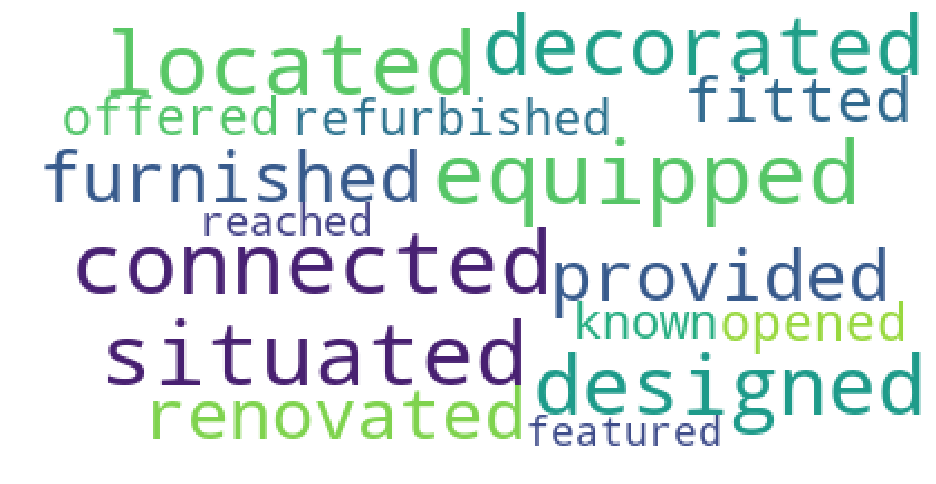

In [57]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,12.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=900             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(important_verbs))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("important_verbs.png", dpi=900)

In [0]:
important_nouns=[]
for word in Counter(new_text_nouns_only_for_importance).most_common():
    important_nouns.append(word[0])

## But what things they are talking about? What they want to be connected to/ located by? The below word cloud bring the details. They are all about "Hotels", " Restaurants", "internet", "Ammenity", "Airport". And yes, "Bathrooms"!

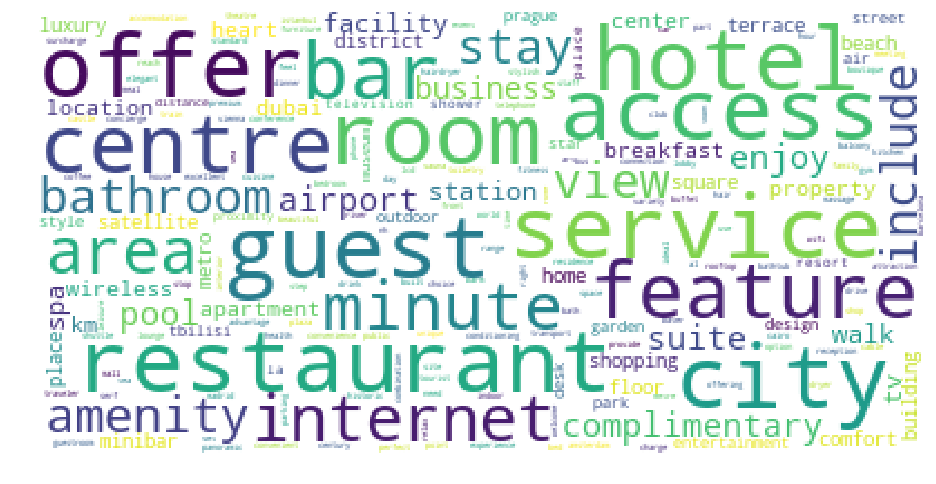

In [59]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,12.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=900             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(important_nouns))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("important_nouns.png", dpi=900)

# Let us check out - Bigrams

In [0]:
bigrm = list(nltk.bigrams(new_text2))

In [0]:
new_bigram_text=[]

In [0]:
for i in bigrm:
    new_bigram_text.append(' '.join(i))

# Happy Customers are very particular about Access to internet, Hotel Location, Home like experience, proximity to airport, Air conditioning, Spa, room service , Free wifi, property location, and city centred Facilities

In [63]:
Counter(new_bigram_text).most_common(55)

[('internet access', 318),
 ('wireless internet', 278),
 ('private bathroom', 189),
 ('hotel located', 180),
 ('hotel offer', 177),
 ('complimentary wireless', 176),
 ('home one', 142),
 ('make home', 140),
 ('close proximity', 136),
 ('hotel within', 129),
 ('within close', 128),
 ('keep connected', 124),
 ('international airport', 124),
 ('city centre', 123),
 ('air conditioning', 122),
 ('walking distance', 121),
 ('spa premium', 119),
 ('premium amenity', 119),
 ('room service', 116),
 ('swimming pool', 116),
 ('room suite', 113),
 ('metro station', 113),
 ('room featuring', 107),
 ('free wifi', 106),
 ('one room', 103),
 ('amenity include', 95),
 ('old town', 94),
 ('hotel room', 93),
 ('star hotel', 93),
 ('outdoor pool', 93),
 ('satellite tv', 92),
 ('access keep', 87),
 ('featuring minibar', 83),
 ('convenience include', 82),
 ('buffet breakfast', 82),
 ('train station', 81),
 ('minute walk', 80),
 ('restaurant bar', 76),
 ('located heart', 75),
 ('hotel also', 75),
 ('boutique

## Let us check out few reviews in particular which have are giving negative sentiments. They are megerly 8 of them. Going through them, it doesn't look like they are actually negatives. This is happened because lack of domain knowledge in algorithms. These words are required to be fed in positively in the algos. Though these sentiments are negetive, they are very close to zero.

In [64]:
df.loc[df['raw_sentiment']<0]

,Summary,Summary_2,Summary_3,Hotel,raw_sentiment
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,Le Meridien Heliopolis is a luxurious 5-star h...,Cairo,-0.012500
24,"Situated in the heart of Taksim, the Green Par...",Situated in the heart of Taksim the Green Park...,Situated in the heart of Taksim the Green Park...,Green Park Hotel,-0.070000
85,"3 stars family owned and managed property, hal...",stars family owned and managed property halfwa...,3 stars family owned and managed property half...,Budapest Located,-0.021212
481,"Small boutique hotel with 74 rooms, of which t...",Small boutique hotel with rooms of which there...,Small boutique hotel with 74 rooms of which th...,Porto,-0.009394
554,swimming pool will be closed from January 26th...,swimming pool will be closed from January till...,swimming pool will be closed from January 26th...,None,-0.112500
838,An urban retreat in an estate with manicured g...,An urban retreat in an estate with manicured g...,An urban retreat in an estate with manicured g...,Dubai,-0.133333
1181,"Entering from the beach road, you pass the Tro...",Entering from the beach road you pass the Trop...,Entering from the beach road you pass the Trop...,the Tropica Bungalow Hotel & Restaurant,-0.014935
1205,Hotel Exe Moncloa is located in Madrid's Chamb...,Hotel Exe Moncloa is located in Madrid Chamber...,Hotel Exe Moncloa is located in Madrid's Chamb...,Hotel Exe Moncloa,-0.040000


## Now let us do a sentence wise sentiment analysis (We didn't remove full stops in summary for this stage). We will average out the sentiments sentence wise and assign it to the whole review. We will also, remove the sentences which are neutral so that they don't over-shadow the real sentiments on averaging. 

In [0]:
def mean(numbers):
    numbers=[i for i in numbers if i != 0.0]
    return float(sum(numbers)) / max(len(numbers), 1)

In [0]:
def sentiment(text): 
    sentiments=[]
    for i in TextBlob(text).sentences:
        sentiments.append(i.polarity)
        #print(i)
        #print(i.polarity)
    return mean(sentiments)

In [0]:
df['sentence_sentiment']= df['Summary'].apply(lambda x: sentiment(x))

## We find that the sentence processed sentiment have higher values than raw sentiment analysis performed. Customers are more happier than previously assumed. Again, no negative sentiment.

In [68]:
df.head()

,Summary,Summary_2,Summary_3,Hotel,raw_sentiment,sentence_sentiment
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,None,0.183333,0.375000
1,Property Location With a stay at Enziana Hotel...,Property Location With a stay at Enziana Hotel...,Property Location With a stay at Enziana Hotel...,Enziana Hotel,0.150000,0.300000
2,"Grand not only in name but also in comfort, st...",Grand not only in name but also in comfort sty...,Grand not only in name but also in comfort sty...,Warwick Hotel,0.285185,0.408333
3,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...,Arty Cosy Trendy The star Hotel is characteris...,Arty Cosy Trendy The 4 star Hotel Nâ€™vY is ch...,Geneva,0.250000,0.500000
4,"A blend of design and warmth, the 4 star Hotel...",A blend of design and warmth the star Hotel Au...,A blend of design and warmth the 4 star Hotel ...,Hotel Auteuil,0.510185,0.483333


## Let us check out how much happy are the customers in each category. Most Negtive being -1 and most positive being 1.

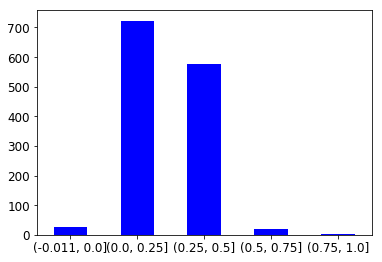

In [69]:
out = pd.cut(df['raw_sentiment'], bins=[-0.01,0, 0.25, 0.5, 0.75, 1], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

# False Negatives cases - are required to be checked to assess the overall performance. We see that only 0.06% of cases have been wrongly tagged.

In [70]:
len(df.loc[df['raw_sentiment']<0])/len(df)*100

0.5908419497784343

## Looking at the locations which we could founf out from reviews, it looks like the data is all from Europe as most of the cities mentioned are from europe. The most reviewed hotels are in Madrid. 

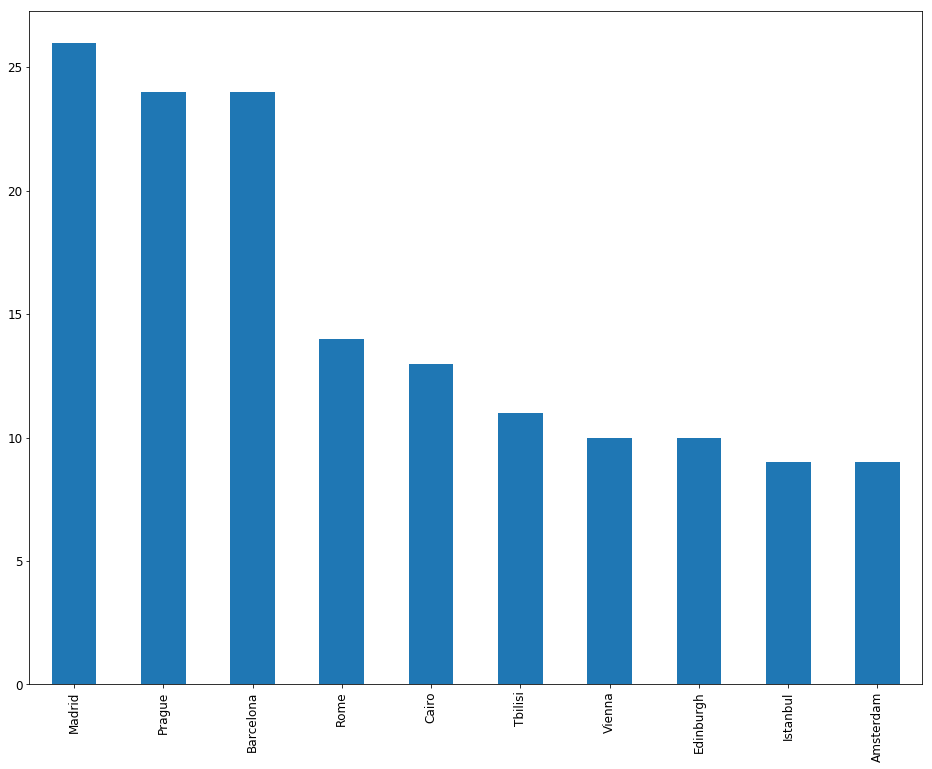

In [71]:
df.Hotel.value_counts()[:10].plot(kind='bar')

## We can find out the clustering of embedding of the word using word2vec from gensims. however, some environmental problem is occuring. 

In [0]:
#!pip install --upgrade gensim

In [0]:
import gensim

In [74]:
' '.join(df.Summary)

"When you stay at NH Vienna Airport Conference Center in Schwechat, you'll be near the airport and within the vicinity of Central Cemetery and Neugebaude Castle. This 4-star hotel is within the region of Golf Club Leopoldsdorf and Gasometer.Rooms Make yourself at home in one of the 500 air-conditioned rooms featuring minibars. Complimentary wireless Internet access is available to keep you connected. Conveniences include direct-dial phones, as well as safes and desks.Rec, Spa, Premium Amenities Take advantage of recreational opportunities offered, including a sauna, a steam room, and a fitness facility. Additional features include wireless Internet access (surcharge), a television in the lobby, and tour/ticket assistance.Dining Enjoy a meal at a restaurant, or stay in and take advantage of the hotel's 24-hour room service. Property Location With a stay at Enziana Hotel, you'll be centrally located in Vienna, walking distance from Botanical Garden of the University of Vienna and close t

In [76]:
df.head(100)

,Summary,Summary_2,Summary_3,Hotel,raw_sentiment,sentence_sentiment
0,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,When you stay at NH Vienna Airport Conference ...,None,0.183333,0.375000
1,Property Location With a stay at Enziana Hotel...,Property Location With a stay at Enziana Hotel...,Property Location With a stay at Enziana Hotel...,Enziana Hotel,0.150000,0.300000
2,"Grand not only in name but also in comfort, st...",Grand not only in name but also in comfort sty...,Grand not only in name but also in comfort sty...,Warwick Hotel,0.285185,0.408333
3,Arty. Cosy. Trendy. The 4 star Hotel Nâ€™vY is...,Arty Cosy Trendy The star Hotel is characteris...,Arty Cosy Trendy The 4 star Hotel Nâ€™vY is ch...,Geneva,0.250000,0.500000
4,"A blend of design and warmth, the 4 star Hotel...",A blend of design and warmth the star Hotel Au...,A blend of design and warmth the 4 star Hotel ...,Hotel Auteuil,0.510185,0.483333
5,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,A stay at NH Geneva City places you in the hea...,Geneva,0.162963,0.229630
6,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,The Dolder Grand is the perfect environment fo...,Zurich,0.565625,0.575000
7,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,NH Prague City is a unique and modern hotel si...,Savour,0.416667,0.405333
8,Le Meridien Heliopolis is a luxurious 5-star h...,Le Meridien Heliopolis is a luxurious hotel co...,Le Meridien Heliopolis is a luxurious 5-star h...,Cairo,-0.012500,-0.016667
9,In a typical 1940s building of Barcelonaâ€™s E...,In a typical building of Eixample district tha...,In a typical 1940s building of Barcelonaâ€™s E...,Art Hotel,0.249592,0.177427
